# constructing 2D/3D local box using GeoPoints.jl 

Nobuaki Fuji (IPGP/UPC/IUF) December 2025

In [1]:
using Pkg

cd(@__DIR__)
Pkg.activate("../")
ParamFile = "../config/testparam.csv"


include("../src/planet1D.jl")
include("../src/GeoPoints.jl")

using .planet1D, .GeoPoints

  Activating 

  1.929085 seconds (4.58 M allocations: 209.572 MiB, 2.31% gc time, 99.98% compilation time)


project at `~/Documents/Github/flexOPT`


In [2]:
set_default_planet!(:Earth) # if you wish to go to other telluric bodies, otherwise this is not necessary

Ellipsoid(Earth)

In [3]:
# two (extreme) points that can define the slice (or the x-y local plane for 3D box)
p1 = GeoPoint(48.8566,2.3522) # Paris (latitude, longitude)
p2 = GeoPoint(42.8,1.5) # Tarascon (à peu près)


Δx = 50.0 # in metre
Δz = 50.0

altMax = 20.e3 # in metre
altMin = -100.e3 # in metre

-100000.0

In [4]:
@show p1 # GeoPoint has some attributes

p1 = GeoPoint(48.8566, 2.3522, 0.0, [4.200914795649138e6, 172559.77631070156, 4.780081341967356e6], 6.366053693814456e6)


GeoPoint(48.8566, 2.3522, 0.0, [4.200914795649138e6, 172559.77631070156, 4.780081341967356e6], 6.366053693814456e6)

In [5]:
# make a box/rectangle

allGridsInGeoPoints, allGridsInCartesian, effectiveRadii=constructLocalBox(p1,p2,Δx,Δz,altMin,altMax)


(GeoPoint[GeoPoint(48.907887632772656, 2.359796896592829, -99838.236349905, [4.1310335068414416e6, 170237.94705026117, 4.708588583009119e6], 6.266197031478216e6) GeoPoint(48.90786158120419, 2.359793033943057, -99788.31851958811, [4.1310684474858455e6, 170239.1079648914, 4.708624329388598e6], 6.266246958667047e6) … GeoPoint(48.84655971568837, 2.3507145504395814, 19918.333283166365, [4.214856112766273e6, 173022.98124815943, 4.794344147379525e6], 6.3859756346916575e6) GeoPoint(48.8465346306368, 2.350710839849349, 19968.254166095423, [4.214891053410677e6, 173024.14216278965, 4.794379893759004e6], 6.3860255645881295e6); GeoPoint(48.90743406019147, 2.3597254009107855, -99841.10145693675, [4.1310692251434894e6, 170234.2553377939, 4.708553789702897e6], 6.266194334294425e6) GeoPoint(48.90740801221654, 2.359721538898719, -99791.1836038201, [4.1311041657878933e6, 170235.4162524241, 4.708589536082376e6], 6.266244261504746e6) … GeoPoint(48.846114603919595, 2.3506445526634843, 19915.521856576263, [4

In [6]:
allGridsInCartesian[20,30]

localCoord2D(Integer[20, 30], [950.0, -98550.0], [0.998552590032688, 0.05378405840963351], [-0.053784058409633496, 0.9985525900326878])

In [8]:
seismicModel=getParamsAndTopo(allGridsInGeoPoints,effectiveRadii,2.0)

┌ Info: File /Users/nobuaki/Documents/Github/flexOPT/data/topoViaGMT/topoViaGMT_573d022e.jld2 does not exist. Producing it now...
└ @ DrWatson /Users/nobuaki/.julia/packages/DrWatson/2QF5p/src/saving_files.jl:106
┌ Warning: The Git repository ('/Users/nobuaki/Documents/Github/flexOPT') is dirty! Appending -dirty to the commit ID.
└ @ DrWatson /Users/nobuaki/.julia/packages/DrWatson/2QF5p/src/saving_tools.jl:71
┌ Info: File /Users/nobuaki/Documents/Github/flexOPT/data/topoViaGMT/topoViaGMT_573d022e.jld2 saved.
└ @ DrWatson /Users/nobuaki/.julia/packages/DrWatson/2QF5p/src/saving_files.jl:115


(ρ = [3.3725411830199197 3.3725466123043066 … 0.0 0.0; 3.372540871685798 3.3725463009725205 … 0.0 0.0; … ; 3.3722953694174187 3.372300798699781 … 0.0 0.0; 3.372295644537562 3.3723010738175865 … 0.0 0.0], Vpv = [7.936501067356701 7.936557665529301 … 0.0 0.0; 7.936497821819892 7.936554420016829 … 0.0 0.0; … ; 7.933938556405155 7.933995154556642 … 0.0 0.0; 7.933941424425364 7.933998022552484 … 0.0 0.0], Vph = [8.135589067359293 8.135625271998045 … 0.0 0.0; 8.135586991258911 8.135623195913233 … 0.0 0.0; … ; 8.133949883989178 8.133986088614426 … 0.0 0.0; 8.133951718600276 8.133987923209938 … 0.0 0.0], Vsv = [4.413419311905491 4.413407802512621 … 0.0 0.0; 4.4134199718942595 4.413408462496439 … 0.0 0.0; … ; 4.413940405501318 4.413928896112741 … 0.0 0.0; 4.413939822281581 4.4139283128979585 … 0.0 0.0], Vsh = [4.544031640720238 4.54407647387508 … 0.0 0.0; 4.5440290698306205 4.544073903004742 … 0.0 0.0; … ; 4.542001796910794 4.5420466300489135 … 0.0 0.0; 4.542004068757892 4.542048901876709 … 0.0

In [9]:
Nx,Nz=size(allGridsInCartesian)

(13522, 2401)

In [13]:
maximum(seismicModel.ρ)

3.380723100867476

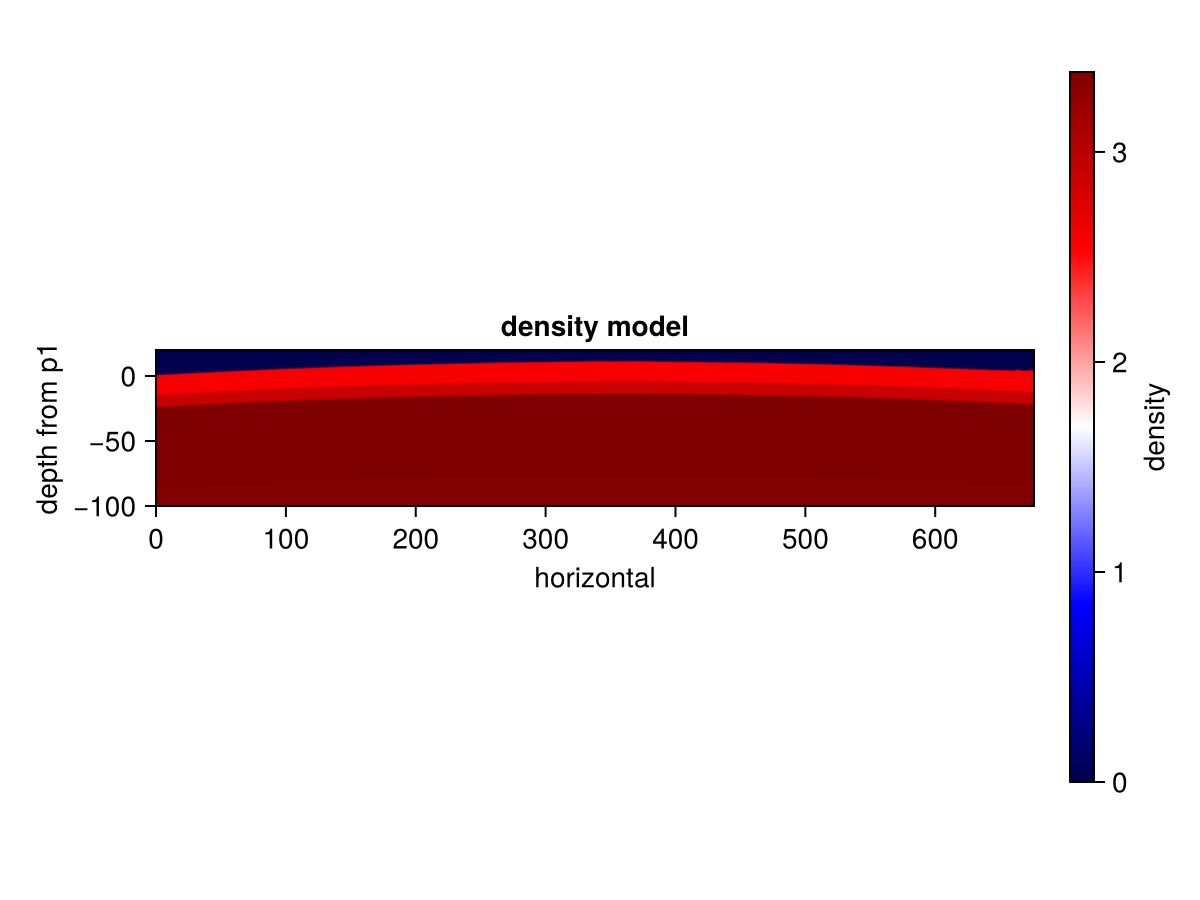

In [14]:
using CairoMakie
fig, ax, hm = heatmap(
    #topo.x,topo.y,topo.z';
    collect((0:1:(Nx-1)).*Δx).*1.e-3,(collect(0:1:(Nz-1)).*Δz.+altMin).*1.e-3, seismicModel.ρ;
    colormap = :seismic,
    #colorrange=(0,4),
    axis = (aspect = DataAspect(), xlabel = "horizontal", ylabel = "depth from p1", title = "density model")
)
Colorbar(fig[1,2], hm, label="density")
fig

# another way of importing model parameters

In [15]:
include("../src/imageReader.jl")
using .imageReader

here, i try to use some of heritages from demo1.ipynb (flex in myOwnApplications in the old version)

# now construction of OPT operators

# Let's go to Mars

In [ ]:
set_default_planet!(:Mars)


# ok i need to change how to call 1D planet models too (because it is already called by DSM1D and it is not very much flexible but here I just use the same params as Earth)

In [ ]:
p1 = GeoPoint(15.0,135.0) # we should see Elysium planitia at least
p2 = GeoPoint(15.0,180.0) # 

In [ ]:
Δx = 3.e3 # in metre
Δy = 3.e3
Δz = 3.e3

horizontalDepthMin = -1000.e3
horizontalDepthMax = 1000.e3


altMax = 100.e3 # in metre
altMin = -600.e3 # in metre



In [ ]:
allGridsInGeoPoints, allGridsInCartesian, effectiveRadii=constructLocalBox(p1,p2,Δx,Δy,Δz,horizontalDepthMin,horizontalDepthMax,altMin,altMax)

In [ ]:
Nx,Ny,Nz=size(allGridsInCartesian)

In [ ]:
seismicModel=getParamsAndTopo(allGridsInGeoPoints,2.0)

In [ ]:
using CairoMakie
fig, ax, hm = heatmap(
    #topo.x,topo.y,topo.z';
    collect((0:1:(Nx-1)).*Δx).*1.e-3,(collect(0:1:(Nz-1)).*Δz.+altMin).*1.e-3, seismicModel.Vsv[:,(Ny÷6)*1,:];
    colormap = :seismic,
    colorrange=(0,15),
    axis = (aspect = DataAspect(), xlabel = "horizontal", ylabel = "depth from p1", title = "Vph model")
)
ylims!(ax,-200,300)
xlims!(ax,0,400)
Colorbar(fig[1,2], hm, label="P-wave")
fig